# Salary Classification

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score
import warnings

warnings.filterwarnings('ignore')

In [119]:
df = pd.read_csv('salary.csv')

## Data Exploration:

In [120]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [122]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Data Preprocessing:

In [123]:
## Checking the shape, number of duplicate and missing values:

print(f'The number of rows in the dataset is: {df.shape[0]}')
print(f'The number of columns/features in the dataset is: {df.shape[1]}')
print(f'The number of duplicate entries in the dataset is: {df.duplicated().sum()}')
print(f'The number of missing values in the dataset is: {df.isna().sum().sum()}')

The number of rows in the dataset is: 32561
The number of columns/features in the dataset is: 15
The number of duplicate entries in the dataset is: 24
The number of missing values in the dataset is: 0


* There are no missing values.
* There are 24 duplicate entries that must be removed.

In [124]:
## Removing duplicate entries:

df.drop_duplicates(inplace = True)

In [125]:
## Check df shape after removing duplicates:

print(f'The number of rows in the dataset is: {df.shape[0]}')
print(f'The number of columns/features in the dataset is: {df.shape[1]}')

The number of rows in the dataset is: 32537
The number of columns/features in the dataset is: 15


* There are now 24 less rows in the dataset.

In [126]:
## For each categorical feature, check its unique outcomes (labels):
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].unique())
        print()

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' I

**Observations:**

* There are whitespaces everywhere.
* A ? label appears in the workclass, occupation and native-country features

In [127]:
## Lets remove all whitespaces across the dataset

df = df.applymap(lambda x: x.strip() if (type(x) == str) else x)

In [128]:
## Lets temporarily replace ? with 'np.nan' across the dataset

df.replace('?', np.nan, inplace = True)

In [129]:
## Now we can count how many occurrences of these ? we originally had in each feature/column:

df.isna().sum()[df.isna().sum() > 0]

workclass         1836
occupation        1843
native-country     582
dtype: int64

**Observations:**
* As seen, we had a significant amount of entries that were labelled with ?
* It's difficult to replace such data with a summary statistic like mean, or median because they fall under a categorical feature. Therefore, we can create a new label/unique value in the 3 affected columns.

In [130]:
df['workclass'].fillna('UnknownClass', inplace = True)
df['occupation'].fillna('UnknownOcc', inplace = True)
df['native-country'].fillna('UnknownCountry', inplace = True)

## Check that the na values have been replaced with new values

df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [131]:
## Lets check all our changes were made to each categorical feature:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].unique())
        print()

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'UnknownClass' 'Self-emp-inc' 'Without-pay' 'Never-worked']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'UnknownOcc'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Male' 'Female']

native-country
['United-States' 'Cuba' 'Jamaica' 'India' 'UnknownCountry' 'Mexico'
 'South' 'Pue

## Model Building:

### Step 1: Encoding

It's import to convert categorical data into numeric to allow our machine learning algorithm to handle the data. There are two potential choices.  
* Label Encoding
* One-Hot Encoding

In our case, I chose Label Encoding provides much greater space efficiency compared to One-Hot Encoding. As there are a plethora of labels, One-Hot Encoding would significantly increase the Dimensionality of the dataset because for a feature with 'k' labels, there would be 'k' new features created.

In [132]:
## Firstly: Split our dataset into numeric and categorical features

categorical_features = [x for x in df.columns if df[x].dtype == 'O']
numeric_features = [x for x in df.columns if df[x].dtype != 'O']

In [133]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [134]:
## After perfomring Label Encoding:

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


### Step 2: Feature Scaling

Feature Scaling is important to ensure all features are on the same scale, and no feature(s) dominate the model due to their larger scale. There are two commonly used methods:

* Standard Scaler: We will use this for features that have a distribution that has low to moderate skewness.
* MinMaxScaler: We will use this for features with highly positive or negative skewness.

In [135]:
## Looking at the skewness of each feature:

df.skew().sort_values(ascending = False)

capital-gain      11.949403
capital-loss       4.592702
fnlwgt             1.447703
salary             1.211687
relationship       0.786548
workclass          0.719383
age                0.557663
hours-per-week     0.228759
occupation         0.126548
marital-status    -0.012753
education-num     -0.309500
sex               -0.719449
education         -0.934160
race              -2.435338
native-country    -4.240094
dtype: float64

As seen, the features which have highly positive or negative skewness are:

* capital-gain
* capital-loss
* native-country
* race

We will apply MinMaxScaler on these features, and apply Standard Scaler on the remaining.

In [136]:
## Obtaining the highly skewed features:

skewed_features = [x for x in df.columns if abs(df[x].skew()) > 2 and x != 'salary']   # Keep only features with skewness > 2
non_skewed_features = [x for x in df.columns if abs(df[x].skew()) <= 2 and x != 'salary']

In [137]:
print(f'The skewed features are {skewed_features}')
print()
print(f'The non-skewed features are {non_skewed_features}')

The skewed features are ['race', 'capital-gain', 'capital-loss', 'native-country']

The non-skewed features are ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'hours-per-week']


In [138]:
## Applying minmaxscaler to skewed features.
## Applying standardscaler to non-skewed features.

minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()

df[skewed_features] = minmaxscaler.fit_transform(df[skewed_features])
df[non_skewed_features] = standardscaler.fit_transform(df[non_skewed_features])

In [139]:
## After perfomring Feature Scaling:

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.030390,1.876197,-1.063569,-0.335266,1.134777,0.921857,-1.483535,-0.277864,1.0,0.703020,0.02174,0.0,-0.035664,0.926829,0
1,0.836973,1.175970,-1.008668,-0.335266,1.134777,-0.405919,-0.790564,-0.900126,1.0,0.703020,0.00000,0.0,-2.222483,0.926829,0
2,-0.042936,-0.224485,0.245040,0.181519,-0.420679,-1.733696,-0.328584,-0.277864,1.0,0.703020,0.00000,0.0,-0.035664,0.926829,0
3,1.056950,-0.224485,0.425752,-2.402406,-1.198407,-0.405919,-0.328584,-0.900126,0.5,0.703020,0.00000,0.0,-0.035664,0.926829,0
4,-0.776193,-0.224485,1.408066,-0.335266,1.134777,-0.405919,0.595376,2.211186,0.5,-1.422436,0.00000,0.0,-0.035664,0.097561,0


### Step 3: Feature Selection (Feature Correlation Analysis)

We now consider the features that are irrelevant, meaning have a low correlation with the dependent variable (salary). We do so by computing the correlation between salary and each feature, and selecting only features with a relatively high correlation as they will have a stronger impact on the model.

In [140]:
df.corr()['salary'].sort_values(ascending = False)

salary            1.000000
education-num     0.335272
age               0.234037
hours-per-week    0.229658
capital-gain      0.223336
sex               0.215969
capital-loss      0.150501
education         0.079366
race              0.071847
native-country    0.022787
occupation        0.010674
fnlwgt           -0.009502
workclass        -0.048668
marital-status   -0.199199
relationship     -0.250948
Name: salary, dtype: float64

In [141]:
## Removing any feature with an absolute correlation < 0.1

df = df.drop(columns = ["fnlwgt", "education", "race", "workclass", "native-country", "occupation", "marital-status"])

df.head()

,age,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,salary
0,0.030390,1.134777,-0.277864,0.703020,0.02174,0.0,-0.035664,0
1,0.836973,1.134777,-0.900126,0.703020,0.00000,0.0,-2.222483,0
2,-0.042936,-0.420679,-0.277864,0.703020,0.00000,0.0,-0.035664,0
3,1.056950,-1.198407,-0.900126,0.703020,0.00000,0.0,-0.035664,0
4,-0.776193,1.134777,2.211186,-1.422436,0.00000,0.0,-0.035664,0


### Step 4: Splitting Data

We must now split the data into training and test sets with 80% of data randomly being assigned into training and 20% of data randomly being assigned into test

In [142]:
X = df[['age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['salary']

In [143]:
## Splitting data:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 50)

In [144]:
print(f'The shape of the training set is {X_train.shape}')
print(f'The shape of the test set is {X_test.shape}')

The shape of the training set is (26029, 6)
The shape of the test set is (6508, 6)


### Step 5: Testing accuracy of differnet hyperparameters

In this step, I will try out different hyperparameter values for my model, and obtain values which closely maximise model accuracy.

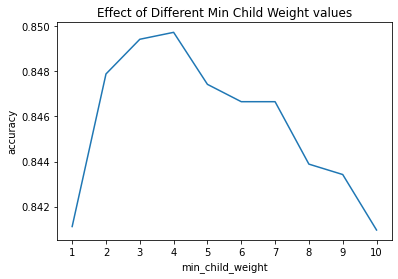

In [145]:
## Testing different min_child_weight values
estimators = np.arange(1, 11, 1)
accuracy = []

for n in estimators:
    xgb_model.set_params(max_depth=n)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.xticks(np.arange(1, 11, 1))
plt.title("Effect of Different Min Child Weight values")
plt.xlabel("min_child_weight")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy)

plt.show()

It appears the optimal min_child_weight is 4

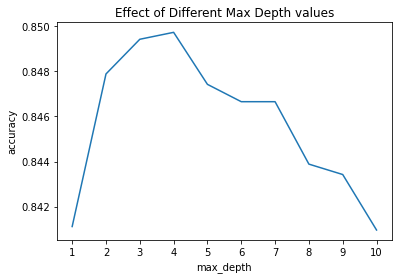

In [146]:
## Testing different max_depth values
estimators = np.arange(1, 11, 1)
accuracy = []

for n in estimators:
    xgb_model.set_params(max_depth=n)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.xticks(np.arange(1, 11, 1))
plt.title("Effect of Different Max Depth values")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy)

plt.show()

It appears the optimal max_depth is 4

### Step 6: Using GridSearchCV

We may use GridSearchCV to further tune the Hyperparameters for an XGBoost Model. Some of the values in step 5 weren't calculated in increments of 1, meaning the true optimal value for the hyperparameter may be around the values found in step 5. Therefore, I can try to find the best *combination* of hyperparameter values from the ones I specify. I will be tuning the following parameters:

* learning_rate: Determines the step size/rate at which the model adapts and learns from previous iteration.
* n_estimators: Number of decision trees in ensemble.
* max_depth: Stopping condition for max depth
* min_child_weight: Stopping condition for when number of examples in a node are below a threshold.

In [147]:
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [30, 100, 200],
    'max_depth': [2, 3, 4],
    'min_child_weight': [1, 2, 3]
}

In [148]:
## Instantitate XGBoost Classifier:

xgb_model = XGBClassifier()

In [149]:
## Initializing GridSearchCV(). n_jobs = -1 parallelizes my training, creating 1 job per core automatically (uses all my cores)
## to speed GridSearch up

grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [150]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy')

In [151]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [152]:
## The optimal hyperparameters include:

best_params

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 200}

Interestingly, the best parameters for max_depth and min_child_weight are not the same as those specified in Part 5's Graphs. Clearly, the *combination* of optimal hyperparameters is more important than the effect of an individual hyperparameter. We should therefore only use the graphs in Part 5 as an estimate of the range of values to try for our gridsearch.

### Step 7: Prediction

We can use our model now to provide predictions as to whether an individual will be paid greater than $50,000 or less than $50,000.

In [153]:
## Obtaining the XGBoost Model's predictions on the training and test datasets

X_train_predict = best_model.predict(X_train)
X_test_predict = best_model.predict(X_test)

In [154]:
## Testing accuracy of predictions against actual results

print(f'The accuracy of the model on the training dataset is {accuracy_score(y_train, X_train_predict) * 100:.2f}%')
print()
print(f'The accuracy of the model on the training dataset is {accuracy_score(y_test, X_test_predict) * 100:.2f}%')

The accuracy of the model on the training dataset is 85.89%

The accuracy of the model on the training dataset is 84.99%


### Step 8: Model Analysis

In [155]:
## Creating Confusion Matrix

cm = confusion_matrix(y_test, X_test_predict)

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   # Normalized confusion matrix

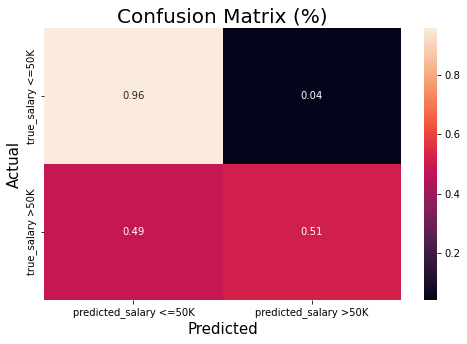

In [156]:
## Plotting Confusion Matrix

true_class_names = ['true_salary <=50K', 'true_salary >50K']
predicted_class_names = ['predicted_salary <=50K', 'predicted_salary >50K']

fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(cmn, annot = True, fmt = '.2f', xticklabels = predicted_class_names, yticklabels = true_class_names)
plt.ylabel('Actual', fontdict = {'fontsize': 15})
plt.xlabel('Predicted', fontdict = {'fontsize': 15})
plt.title('Confusion Matrix (%)', fontdict = {'fontsize': 20})

plt.show()

As seen in the Confusion Matrix, the model performed particularly well when predicting actual salaries <= $50,000 with 96% of all predictions being accurate.  

However, the model performed extremely poorly when predicting actual salaries > $50,000 with only 51% of all predictions being accurate. We will need to explore methods of resolving our high level of inaccuracies in this context for the future.

In [157]:
print(classification_report(y_test, X_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4935
           1       0.79      0.51      0.62      1573

    accuracy                           0.85      6508
   macro avg       0.83      0.74      0.76      6508
weighted avg       0.84      0.85      0.84      6508



There are a few key takeaways from the above classification report:

* The recall when predicting 0's (i.e. true_salary <= 50,000) was significantly better than the recall when predicting 1's (i.e. true_salary > 50,000). This means that the model could correctly identify true instances when salary <= 50000 much better than it could identify true instances when salary > 50000.
$\newline$
* We had significantly more 0 instances than 1 instances. We can see that there were 4,935 individuals with an actual salary <= 50,000 compared to only 1,573 individuals with an actual salary > 50,000. This class imbalance could provide one explanation for the poor results when predicting individuals with an actual salary <= 50,000 as the model might not have learnt this class as well.